# Для работы была выбрана гистоновая метка H3F3A, биполярный нейрон (глаз), в качестве вторичной структуры ДНК была выбрана Z-ДНК(DeepZ.bed - сгенерирована моделью глубинного обучения) :
https://www.encodeproject.org/experiments/ENCSR683ORH/

После скачивания файлы были переименованы и оставлены только первые 5 столбцов:

```!zcat ENCFF066CSA.bed.gz | cut -f1-5 > H3F3A.ENCFF066CSA_hg19.bed```


```!zcat ENCFF343MZY.bed.gz | cut -f1-5 > H3F3A.ENCFF343MZY_hg19.bed```

In [7]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
sns.set_style('whitegrid')

In [221]:
df1 = pd.read_csv("H3F3A.ENCFF066CSA_hg19.bed", header=None, sep='\t')
df2 = pd.read_csv("H3F3A.ENCFF343MZY_hg19.bed", header=None, sep='\t')

In [223]:
header = ['chrom', 'start', 'end', 'name', 'score']
df1.columns = header[:len(df1.columns)]
df2.columns = header[:len(df2.columns)]

In [224]:
df1['len'] = df1['end'] - df1['start']
df2['len'] = df2['end'] - df2['start']

In [218]:
print('Количество пиков:', df1.shape[0])

Количество пиков: 376401


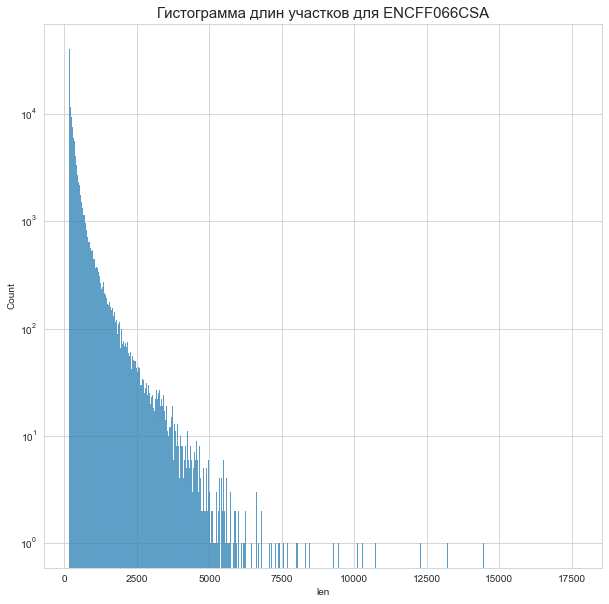

In [9]:
sns.histplot(df1['len']).set(yscale='log')
plt.title("Гистограмма длин участков для ENCFF066CSA", fontsize=15)
plt.rcParams['figure.figsize'] = 10, 10
plt.show()

In [226]:
print('Количество пиков:', df2.shape[0])

Количество пиков: 314861


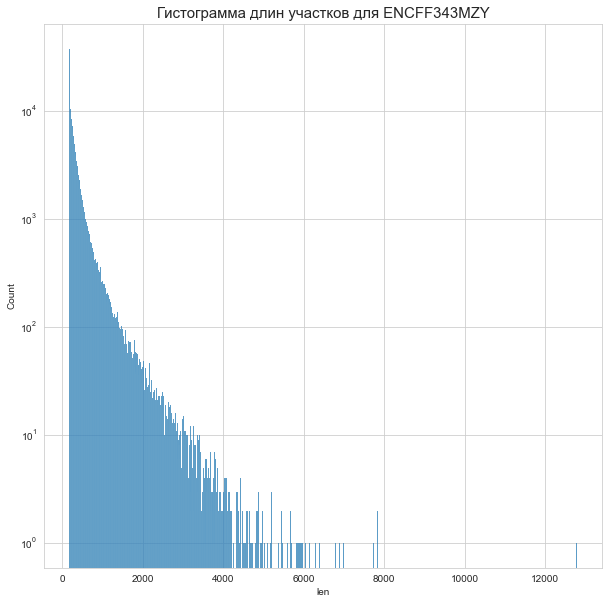

In [10]:
sns.histplot(df2['len']).set(yscale='log')
plt.title("Гистограмма длин участков для ENCFF343MZY", fontsize=15)
plt.rcParams['figure.figsize'] = 10, 10
plt.show()

# Выкидываем слишком длинные пики:

```!cat H3F3A.ENCFF066CSA_hg19.bed | awk '$3-$2<5000' > H3F3A.ENCFF066CSA_hg19.filtered.bed```

```!cat H3F3A.ENCFF343MZY_hg19.bed | awk '$3-$2<4500' > H3F3A.ENCFF343MZY_hg19.filtered.bed ```

In [11]:
df_filtered1 = pd.read_csv("H3F3A.ENCFF066CSA_hg19.filtered.bed", header=None, sep='\t')
df_filtered2 = pd.read_csv("H3F3A.ENCFF343MZY_hg19.filtered.bed", header=None, sep='\t')

In [12]:
header = ['chrom', 'start', 'end', 'name', 'score']
df_filtered1.columns = header[:len(df_filtered1.columns)]
df_filtered2.columns = header[:len(df_filtered2.columns)]
df_filtered1['len'] = df_filtered1['end'] - df_filtered1['start']
df_filtered2['len'] = df_filtered2['end'] - df_filtered2['start']

In [227]:
print('Количество пиков:', df_filtered1.shape[0])

Количество пиков: 375993


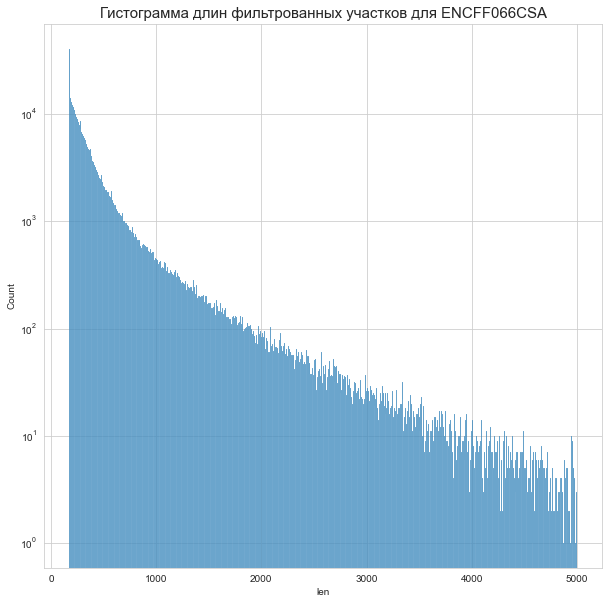

In [13]:
sns.histplot(df_filtered1['len']).set(yscale='log')
plt.title("Гистограмма длин фильтрованных участков для ENCFF066CSA", fontsize=15)
plt.rcParams['figure.figsize'] = 10, 10
plt.show()

In [228]:
print('Количество пиков:', df_filtered2.shape[0])

Количество пиков: 314670


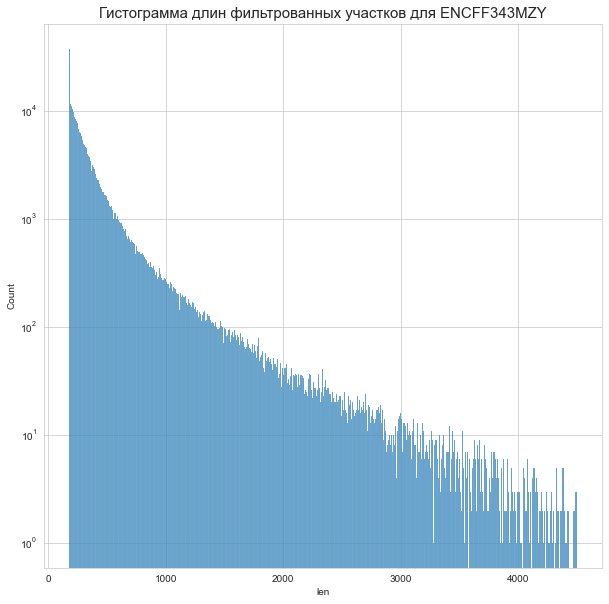

In [14]:
sns.histplot(df_filtered2['len']).set(yscale='log')
plt.title("Гистограмма длин фильтрованных участков для ENCFF343MZY", fontsize=15)
plt.rcParams['figure.figsize'] = 10, 10
plt.show()

# Смотрим, где располагаются пики гистоновой метки относительно аннотированных генов.

**После скачивания разметки генами ищем пересечения:**

```bedtools intersect -a  downstream.bed -b H3F3A.ENCFF066CSA_hg19.filtered.bed  > downstream1.bed```

```bedtools intersect -a  3UTR.bed -b H3F3A.ENCFF066CSA_hg19.filtered.bed  > 3UTRExons.bed```

```bedtools intersect -a  5UTR.bed -b H3F3A.ENCFF066CSA_hg19.filtered.bed  > 5UTRExons.bed```

```bedtools intersect -a  upstream.bed -b H3F3A.ENCFF066CSA_hg19.filtered.bed  > upstream1.bed```

```bedtools intersect -a  Exonsplus.bed -b H3F3A.ENCFF066CSA_hg19.filtered.bed  > Exonsplus1.bed```

```bedtools intersect -a  in.bed -b H3F3A.ENCFF066CSA_hg19.filtered.bed  > in1.bed```

```bedtools intersect -a  codingex.bed -b H3F3A.ENCFF066CSA_hg19.filtered.bed  > coding1.bed```

In [34]:
downstream = pd.read_csv("downstream1.bed", header=None, sep='\t').value_counts().shape[0]
UTR_3 = pd.read_csv("3UTRExons.bed", header=None, sep='\t').value_counts().shape[0]
UTR_5 = pd.read_csv("5UTRExons.bed", header=None, sep='\t').value_counts().shape[0]
upstream = pd.read_csv("upstream1.bed", header=None, sep='\t').value_counts().shape[0]
exonplus = pd.read_csv("Exonsplus1.bed", header=None, sep='\t').value_counts().shape[0]
intronsplus = pd.read_csv("in1.bed", header=None, sep='\t').value_counts().shape[0]
coding = pd.read_csv("coding1.bed", header=None, sep='\t').value_counts().shape[0]

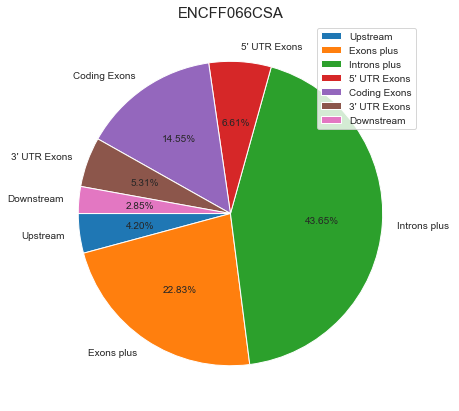

In [48]:
names = ['Upstream', 'Exons plus', 'Introns plus ',"5' UTR Exons", 'Coding Exons', "3' UTR Exons", "Downstream"]
  
data = [upstream, exonplus, intronsplus, UTR_5, coding, UTR_3, downstream ]

fig = plt.figure(figsize =(10, 7))
plt.title("ENCFF066CSA", fontsize=15)
plt.pie(data, labels = names,  autopct='%1.2f%%', startangle = 180)
plt.legend(loc='best')
plt.show()

```bedtools intersect -a  downstream.bed -b H3F3A.ENCFF343MZY_hg19.filtered.bed  > 1downstream1.bed```

```bedtools intersect -a  3UTR.bed -b H3F3A.ENCFF343MZY_hg19.filtered.bed  > 13UTRExons.bed```

```bedtools intersect -a  5UTR.bed -b H3F3A.ENCFF343MZY_hg19.filtered.bed  > 15UTRExons.bed```

```bedtools intersect -a  upstream.bed -b H3F3A.ENCFF343MZY_hg19.filtered.bed  > 1upstream1.bed```

```bedtools intersect -a  Exonsplus.bed -b H3F3A.ENCFF343MZY_hg19.filtered.bed > 1Exonsplus1.bed```

```bedtools intersect -a  in.bed -b H3F3A.ENCFF343MZY_hg19.filtered.bed  > 1in1.bed```

```bedtools intersect -a  codingex.bed -b H3F3A.ENCFF343MZY_hg19.filtered.bed  > 1coding1.bed```

In [49]:
downstream = pd.read_csv("1downstream1.bed", header=None, sep='\t').value_counts().shape[0]
UTR_3 = pd.read_csv("13UTRExons.bed", header=None, sep='\t').value_counts().shape[0]
UTR_5 = pd.read_csv("15UTRExons.bed", header=None, sep='\t').value_counts().shape[0]
upstream = pd.read_csv("1upstream1.bed", header=None, sep='\t').value_counts().shape[0]
exonplus = pd.read_csv("1Exonsplus1.bed", header=None, sep='\t').value_counts().shape[0]
intronsplus = pd.read_csv("1in1.bed", header=None, sep='\t').value_counts().shape[0]
coding = pd.read_csv("1coding1.bed", header=None, sep='\t').value_counts().shape[0]

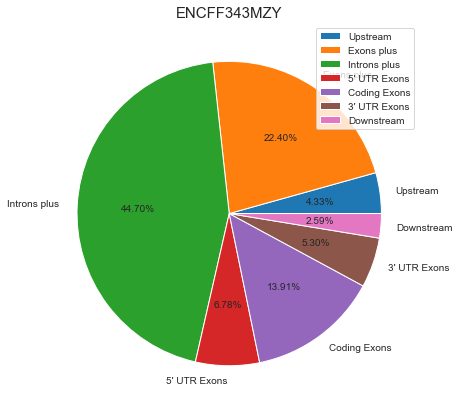

In [51]:
names = ['Upstream', 'Exons plus', 'Introns plus ',"5' UTR Exons", 'Coding Exons', "3' UTR Exons", "Downstream"]
  
data = [upstream, exonplus, intronsplus, UTR_5, coding, UTR_3, downstream ]

fig = plt.figure(figsize =(10, 7))
plt.title("ENCFF343MZY", fontsize=15)
plt.pie(data, labels = names,  autopct='%1.2f%%')
plt.legend(loc='best')
plt.show()

# Объединяем два набора отфильтрованных ChIP-seq пиков с помощью утилиты bedtools merge:

```!cat *.filtered.bed | sort -k1,1 -k2,2n | bedtools merge > H3F3A.merge.hg19.bed```

# Визуализируем исходные два набора ChIP-seq пиков, а также их объединение в геномном браузере, и проверяем корректность работы bedtools merge:

```track visibility=dense name="ENCFF066CSA" description="H3F3A.ENCFF066CSA_hg19.filtered.bed"
https://raw.githubusercontent.com/vladislareon/hse21_H3F3A_ZDNA_human/main/data/H3F3A.ENCFF066CSA_hg19.filtered.bed```

```track visibility=dense name="ENCFF343MZY" description="H3F3A.ENCFF343MZY_hg19.filtered.bed"https://raw.githubusercontent.com/vladislareon/hse21_H3F3A_ZDNA_human/main/data/H3F3A.ENCFF343MZY_hg19.filtered.bed```

```track visibility=dense name="ChIP_merge" color=50,50,200 description="H3F3A.merge.hg19.bed"
https://raw.githubusercontent.com/vladislareon/hse21_H3F3A_ZDNA_human/main/data/H3F3A.merge.hg19.bed```

## Сессия:

http://genome.ucsc.edu/s/vladislav/H3F3A.merge

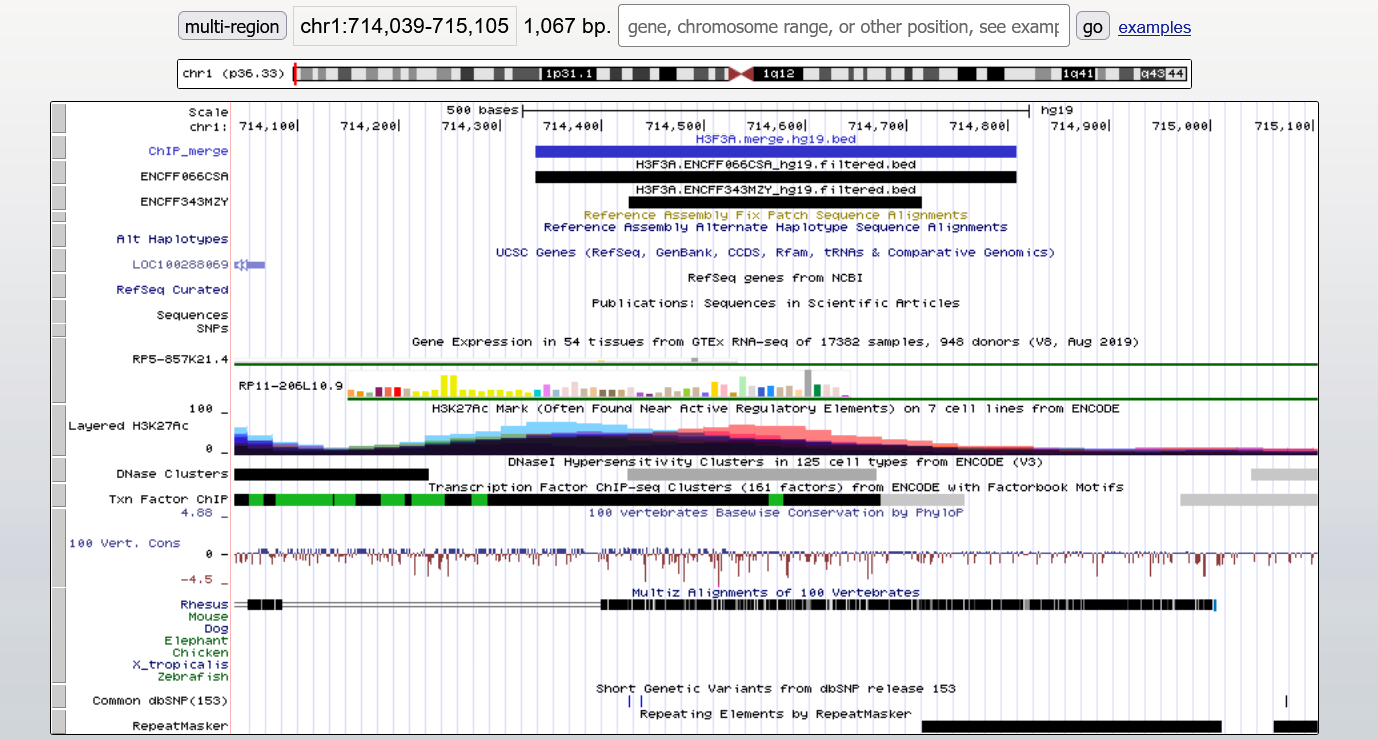

In [41]:
from IPython.display import Image
Image("4.png")

# Скачиваем файл со вторичной структурой ДНК (Z-ДНК):

In [22]:
!pip install wget
import wget 
wget.download('https://raw.githubusercontent.com/Nazar1997/DeepZ/master/annotation/DeepZ.bed')

100% [............................................................................] 461744 / 461744

'DeepZ (1).bed'

In [19]:
dfz = pd.read_csv("DeepZ.bed", header=None, sep='\t')
header = ['chrom', 'start', 'end', 'name', 'score']
dfz.columns = header[:len(dfz.columns)]
dfz['len'] = dfz['end'] - dfz['start']

In [232]:
print('Количество пиков:', dfz.shape[0])

Количество пиков: 19394


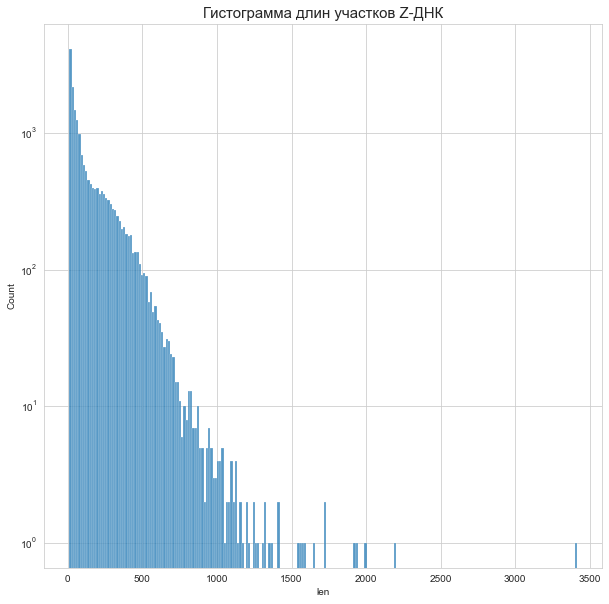

In [20]:
sns.histplot(dfz['len']).set(yscale='log')
plt.title("Гистограмма длин участков Z-ДНК", fontsize=15)
plt.rcParams['figure.figsize'] = 10, 10
plt.show()

# Смотрим, где располагаются участки Z-ДНК относительно аннотированных генов.

```bedtools intersect -a  downstream.bed -b DeepZ.bed  > zdownstream1.bed```

```bedtools intersect -a  3UTR.bed -b DeepZ.bed  > z3UTRExons.bed```

```bedtools intersect -a  5UTR.bed -b DeepZ.bed  > z5UTRExons.bed```

```bedtools intersect -a  upstream.bed -b DeepZ.bed  > zupstream1.bed```

```bedtools intersect -a  Exonsplus.bed -b DeepZ.bed  > zExonsplus1.bed```

```bedtools intersect -a  in.bed -b DeepZ.bed  > zin1.bed```

```bedtools intersect -a  codingex.bed -b DeepZ.bed  > zcoding1.bed```

In [52]:
downstream = pd.read_csv("zdownstream1.bed", header=None, sep='\t').value_counts().shape[0]
UTR_3 = pd.read_csv("z3UTRExons.bed", header=None, sep='\t').value_counts().shape[0]
UTR_5 = pd.read_csv("z5UTRExons.bed", header=None, sep='\t').value_counts().shape[0]
upstream = pd.read_csv("zupstream1.bed", header=None, sep='\t').value_counts().shape[0]
exonplus = pd.read_csv("zExonsplus1.bed", header=None, sep='\t').value_counts().shape[0]
intronsplus = pd.read_csv("zin1.bed", header=None, sep='\t').value_counts().shape[0]
coding = pd.read_csv("zcoding1.bed", header=None, sep='\t').value_counts().shape[0]

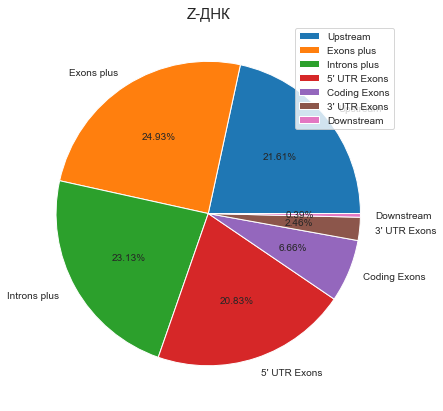

In [53]:
names = ['Upstream', 'Exons plus', 'Introns plus ',"5' UTR Exons", 'Coding Exons', "3' UTR Exons", "Downstream"]
  
data = [upstream, exonplus, intronsplus, UTR_5, coding, UTR_3, downstream ]

fig = plt.figure(figsize =(10, 7))
plt.title("Z-ДНК", fontsize=15)
plt.pie(data, labels = names,  autopct='%1.2f%%')
plt.legend(loc='best')
plt.show()

# Находим пересечения гистоновой метки и Z-ДНК:

```!bedtools intersect -a DeepZ.bed -b H3F3A.merge.hg19.bed > H3F3A.intersect_with_DeepZ.bed```

In [234]:
data = pd.read_csv("H3F3A.intersect_with_DeepZ.bed", header=None, sep='\t')
header = ['chrom', 'start', 'end', 'name', 'score']
data.columns = header[:len(data.columns)]
data['len'] = data['end'] - data['start']

In [235]:
print('Количество пиков:', data.shape[0])

Количество пиков: 10760


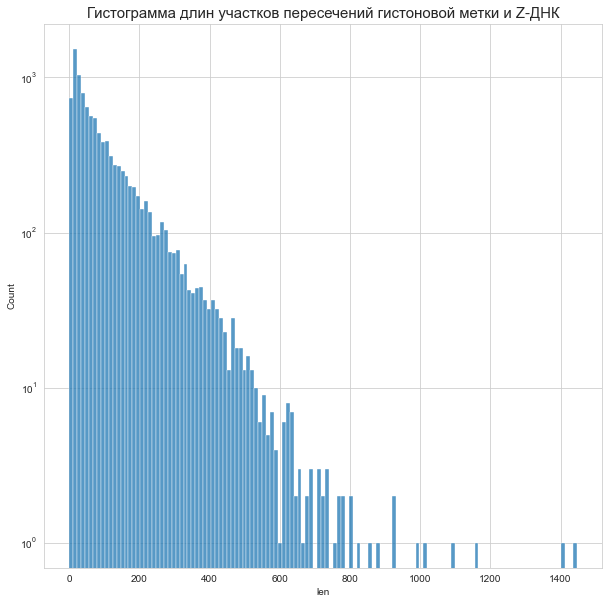

In [24]:
sns.histplot(data['len']).set(yscale='log')
plt.title("Гистограмма длин участков пересечений гистоновой метки и Z-ДНК", fontsize=15)
plt.rcParams['figure.figsize'] = 10, 10
plt.show()

# Смотрим, где располагаются участки пересечения гистоновой метки и Z-ДНК относительно аннотированных генов:

```bedtools intersect -a  downstream.bed -b H3F3A.intersect_with_DeepZ.bed  > ydownstream1.bed```

```bedtools intersect -a  3UTR.bed -b H3F3A.intersect_with_DeepZ.bed  > y3UTRExons.bed```

```bedtools intersect -a  5UTR.bed -b H3F3A.intersect_with_DeepZ.bed  > y5UTRExons.bed```

```bedtools intersect -a  upstream.bed -b H3F3A.intersect_with_DeepZ.bed  > yupstream1.bed```

```bedtools intersect -a  Exonsplus.bed -b H3F3A.intersect_with_DeepZ.bed  > yExonsplus1.bed```

```bedtools intersect -a  in.bed -b H3F3A.intersect_with_DeepZ.bed  > yin1.bed```

```bedtools intersect -a  codingex.bed -b H3F3A.intersect_with_DeepZ.bed  > ycoding1.bed```

In [68]:
downstream = pd.read_csv("ydownstream1.bed", header=None, sep='\t').value_counts().shape[0]
UTR_3 = pd.read_csv("y3UTRExons.bed", header=None, sep='\t').value_counts().shape[0]
UTR_5 = pd.read_csv("y5UTRExons.bed", header=None, sep='\t').value_counts().shape[0]
upstream = pd.read_csv("yupstream1.bed", header=None, sep='\t').value_counts().shape[0]
exonplus = pd.read_csv("yExonsplus1.bed", header=None, sep='\t').value_counts().shape[0]
intronsplus = pd.read_csv("yin1.bed", header=None, sep='\t').value_counts().shape[0]
coding = pd.read_csv("ycoding1.bed", header=None, sep='\t').value_counts().shape[0]

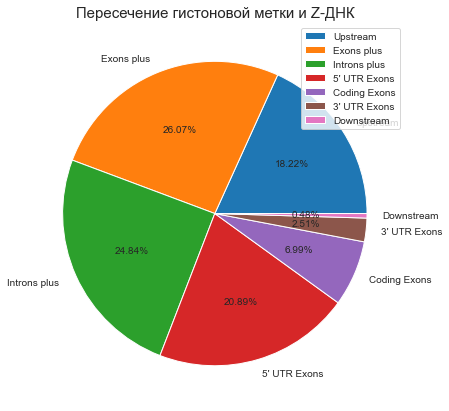

In [69]:
names = ['Upstream', 'Exons plus', 'Introns plus ',"5' UTR Exons", 'Coding Exons', "3' UTR Exons", "Downstream"]
  
data = [upstream, exonplus, intronsplus, UTR_5, coding, UTR_3, downstream ]

fig = plt.figure(figsize =(10, 7))
plt.title("Пересечение гистоновой метки и Z-ДНК", fontsize=15)
plt.pie(data, labels = names,  autopct='%1.2f%%')
plt.legend(loc='best')
plt.show()

# Визуализируем в геномном браузере исходные участки Z-ДНК, а также их пересечения с гистоновой меткой:

```track visibility=dense name="DeepZ" color=0,200,0 description="DeepZ"
https://raw.githubusercontent.com/vladislareon/hse21_H3F3A_ZDNA_human/main/data/DeepZ.bed```

```track visibility=dense name="intersect_with_DeepZ" color=200,0,0 description="H3F3A.intersect_with_DeepZ.bed"
https://raw.githubusercontent.com/vladislareon/hse21_H3F3A_ZDNA_human/main/data/H3F3A.intersect_with_DeepZ.bed```

## Сессия:

http://genome.ucsc.edu/s/vladislav/intersect_with_DeepZ

**Пересечение между гистоновой меткой и Z-ДНК:**

* chr1:933,731-934,360

Геномные координаты: chr1:933,731-934,360


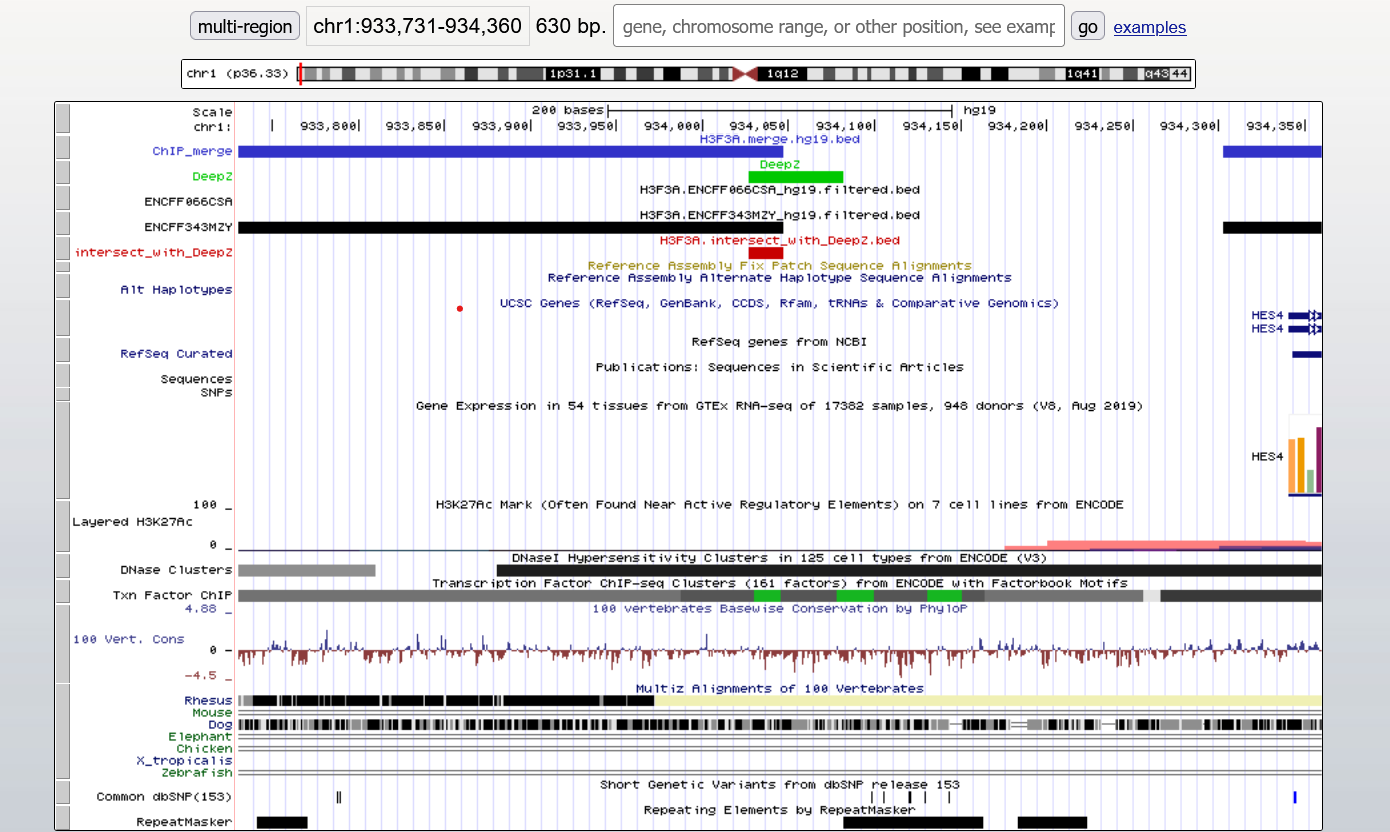

In [44]:
from IPython.display import Image
print('Геномные координаты: chr1:933,731-934,360')
Image("o.png")

* chr1:934,012-934,032

Геномные координаты: chr1:934,012-934,032


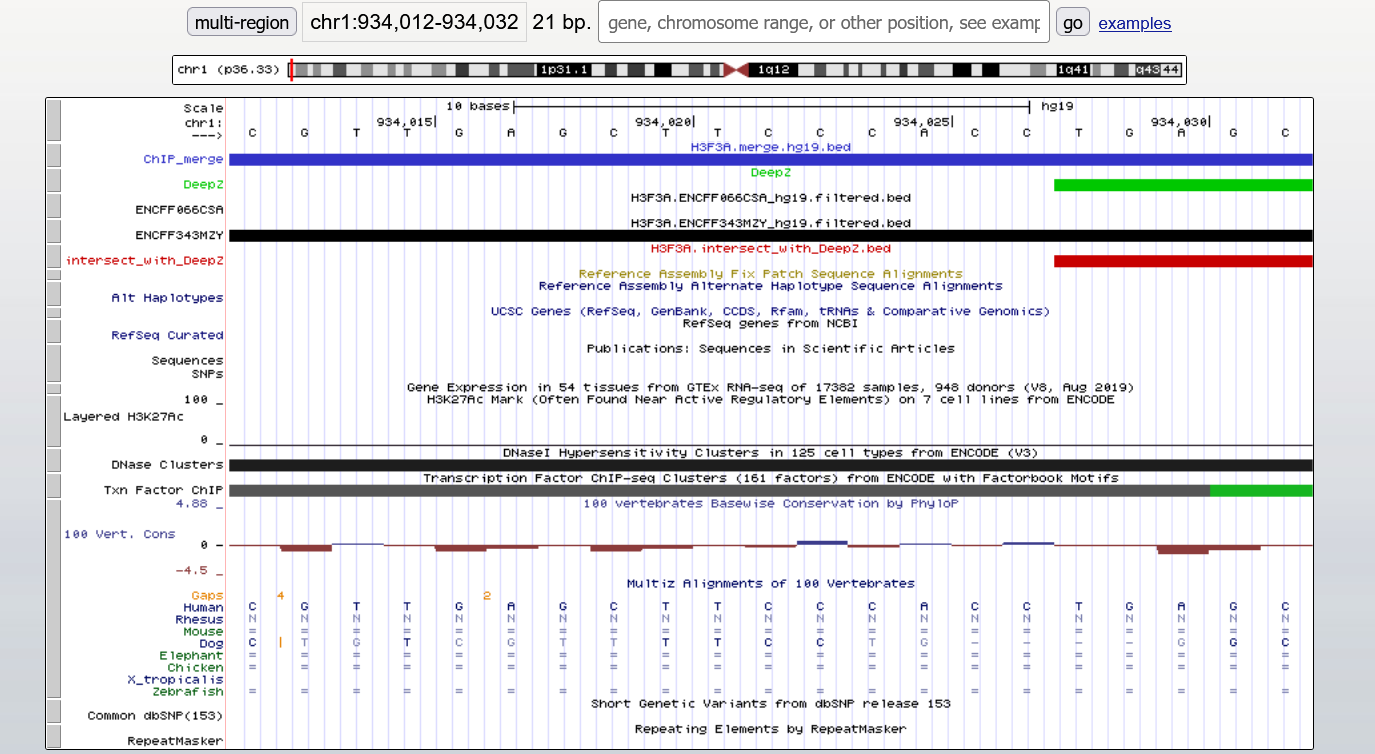

In [46]:
from IPython.display import Image
print('Геномные координаты: chr1:934,012-934,032')
Image("z.png")

# Ассоциируем полученные пересечения с ближайшими генами:

```bedtools intersect -a allgenom.bed -b H3F3A.intersect_with_DeepZ.bed > peaks_associations.bed```

In [208]:
genes_name = pd.read_csv("genes_name.bed", header=None, sep='\t')

In [171]:
new = pd.read_csv("peaks_associations.bed", header=None, sep='\t')[[0, 1, 2]]
header = ['chrom', 'start', 'end']
new.columns = header[:len(new.columns)]

In [172]:
df = genes_name[[2, 4, 5, 12]].iloc[1:]

In [173]:
header = ['chrom', 'start', 'end', 'name2']
df.columns = header[:len(df.columns)]

In [175]:
df['start'] = pd.to_numeric(df['start'])
df['end'] = pd.to_numeric(df['end'])

In [194]:
unique_gene = pd.merge(df,new,on=['chrom', 'start', 'end'],how='inner').drop_duplicates(subset=['name2']).shape[0]

In [193]:
gene = pd.merge(df,new,on=['chrom', 'start', 'end'],how='inner').drop_duplicates(subset=['chrom', 'start', 'end']).shape[0]

In [211]:
pd.merge(df,new,on=['chrom', 'start', 'end'],how='inner').drop_duplicates(subset=['chrom', 'start', 'end']).to_csv('peaks_associations_names.bed', index=None, sep='\t')

In [195]:
print(gene, unique_gene)

8163 5515


In [198]:
pd.merge(df,new,on=['chrom', 'start', 'end'],how='inner').drop_duplicates(subset=['name2'])['name2'].to_csv('H3F3A.intersect_with_DeepZ.unique.txt', index=None)

In [203]:
new.drop_duplicates().to_csv('unique.bed', index=None)

**Количество пиков, которые удалось проассоциировать с генами: 8163**
 
**Общее количество уникальных генов: 5515**

# GO-анализ для полученных уникальных генов:

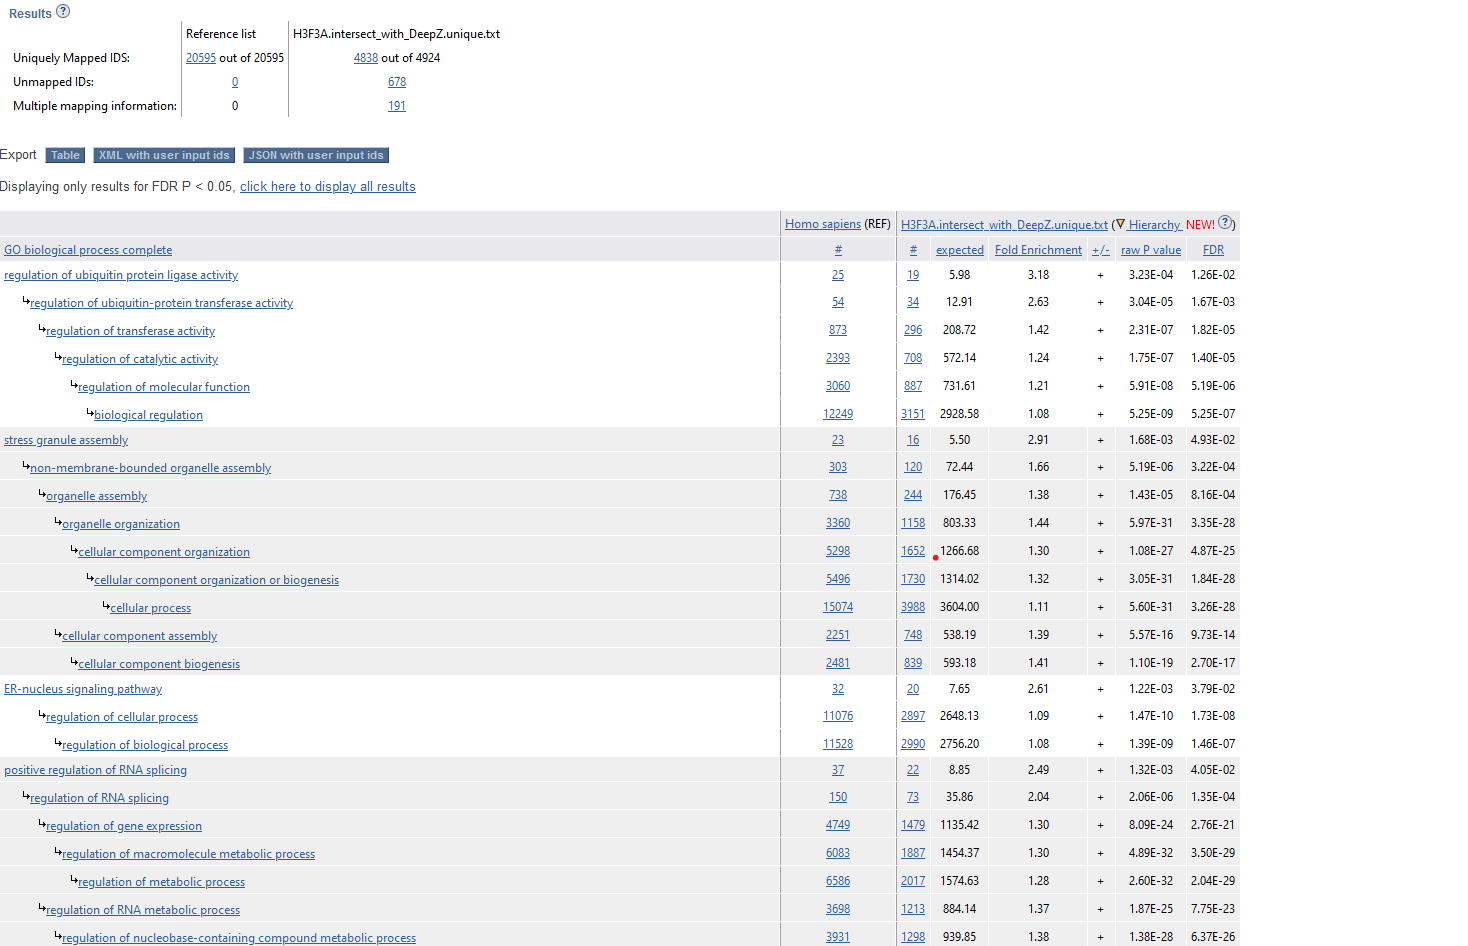

In [206]:
from IPython.display import Image
Image("34.png")